In [2]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import mnist
import matplotlib.pyplot as plt
import sklearn.datasets

In [20]:
make_gen = lambda N = 100: torch.nn.Sequential(
    torch.nn.Linear(2,N),
    torch.nn.ReLU(),
    torch.nn.Linear(N,N),
    torch.nn.ReLU(),
    torch.nn.Linear(N,2)
)
make_disc = lambda: torch.nn.Sequential(
    torch.nn.Linear(2,100),
    torch.nn.ReLU(),
    torch.nn.Linear(100,100),
    torch.nn.ReLU(),
    torch.nn.Linear(100,1),
    torch.nn.Sigmoid()
)

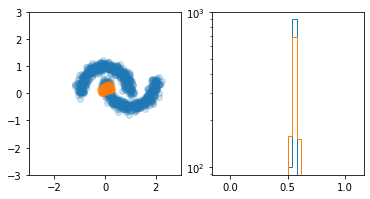

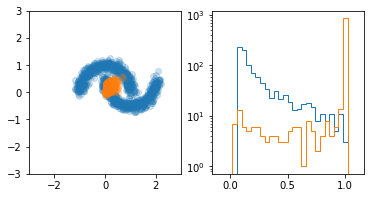

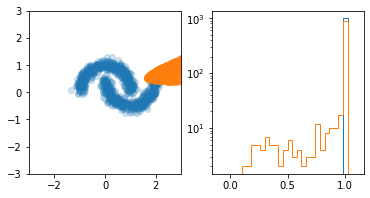

In [28]:
def plot_gan(gen,disc):
    f,axarr = plt.subplots(1,2)
    with torch.no_grad():
        fake = gen(torch.randn(1000,2))
    real = torch.FloatTensor(sklearn.datasets.make_moons(len(fake), noise = 0.1)[0])
    ax = axarr[0]
    ax.scatter(real[:,0],real[:,1],alpha = 0.2)
    ax.scatter(fake[:,0],fake[:,1],alpha = 0.2)
    ax.set_xlim(-3,3)
    ax.set_ylim(-3,3)

    with torch.no_grad():
        samples = torch.cat([fake,real])
        p = disc(samples)
    ax = axarr[1]
    bins = np.linspace(-0.1,1.1,31)
    ax.hist(p[:len(fake),0].ravel(),bins, histtype='step')
    ax.hist(p[len(fake):,0].ravel(),bins, histtype='step')
    ax.set_yscale('log')
    f.set_size_inches(6,3)

def train_gan():
    gen = make_gen()
    disc = make_disc()

    loss_fn = torch.nn.BCELoss()

    opt_gen = optim.Adam(gen.parameters(),1e-4)
    opt_disc = optim.Adam(disc.parameters(),1e-4)

    n_phases = 5
    phase_length = 100
    plot_every = 100
    for i in range(n_phases*phase_length):
        phase = (i//phase_length) % 2
        # print(i,phase)
        for j in range(20):
            gen.zero_grad()
            disc.zero_grad()
            fake = gen(torch.randn(100,2))
            real = torch.FloatTensor(sklearn.datasets.make_moons(len(fake), noise = 0.1)[0])
            inputs = torch.cat([fake,real])
            labels = torch.cat([torch.zeros(len(fake)),torch.ones(len(real))]).reshape(-1,1)
            preds = disc(inputs)
            loss = loss_fn(preds,labels)
            if phase == 1:
                loss = -loss

            loss.backward()
            if phase == 0:
                opt_disc.step()
            else:
                opt_gen.step()
        if i % plot_every*phase_length == 0:
            plot_gan(gen,disc)
            plt.show()

train_gan()